# Final Project
### CHEM ENG/ SEP 787
### Mohammad Kashif Siddiqui - 0755452
### XuLiang Qi - 400347697
### Jing Wang - 40053242

### Plan

1. Test Train Split
2. Cross Validation Data Split

- Classifiers Used:
    a. SVM
    b. KNN
    c. Naive Bayes
    
3. Classifiers Parameter Testing 
4. Computational Times Comparison
5. ROC
6. Confusion Matricies


### Headers

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os 
import pandas as pd
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import random as rn
import sklearn.discriminant_analysis
import time
from sklearn import datasets
import subprocess


from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

### Checking paths

In [6]:
print('current path:')
dir_path = os.getcwd()
print(dir_path)

current path:
C:\Users\User\AppData\Roaming\Python\Python35\Scripts\Allwork\SEP_787


# Read data 

#### Read data in pandas dataframe and transfer to numpy array

In [7]:
tic = time.clock()
data = pd.read_csv('EEG_modified.txt', header = None)
data = pd.DataFrame.to_numpy(data)
toc = time.clock()
print('Elapsed time to load data in seconds:', (toc - tic))

Elapsed time to load data in seconds: 0.05424119999999988


In [8]:
data.shape

(14980, 15)

In [9]:
data[0]

array([4329.23, 4009.23, 4289.23, 4148.21, 4350.26, 4586.15, 4096.92,
       4641.03, 4222.05, 4238.46, 4211.28, 4280.51, 4635.9 , 4393.85,
          0.  ])

# Testing & Training Data Split

In [10]:
# Specify the data 
Input_data=data[:,0:14]

# Isolate labels
labels = data[:,14]

# Split the data up in train and test sets
train_data, test_data, train_label, test_label = train_test_split(Input_data, labels, test_size=0.25, random_state=42)

In [11]:
print('Training set data shape:', train_data.shape)
print('Testing set data shape:', test_data.shape) 
print('Training set label shape:', train_label.shape)
print('Testing set label shape:', test_label.shape)

Training set data shape: (11235, 14)
Testing set data shape: (3745, 14)
Training set label shape: (11235,)
Testing set label shape: (3745,)


In [12]:
print("train_data ex:", train_data[0])
print("train_label ex:", train_label[0])

train_data ex: [4278.97 3988.21 4249.74 4108.21 4325.64 4611.79 4065.64 4614.87 4197.95
 4214.87 4205.13 4271.79 4592.82 4343.08]
train_label ex: 1.0


In [45]:
#Time calculation block
tic = time.clock()

toc = time.clock()
print('Elapsed time to load data in seconds:', (toc - tic))

Elapsed time to load data in seconds: 3.860000015265541e-05


# SVM

In [37]:
#Cross Validation for the C metric (K-fold Cross Validation)

tic = time.clock()
X = train_data[0:1000]
y = train_label[0:1000]

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

toc = time.clock()
print('Elapsed time to load data in seconds:', (toc - tic))

Elapsed time to load data in seconds: 437.72705469999994


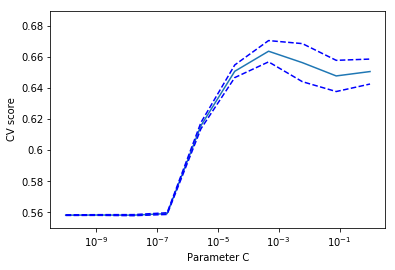

In [46]:
# Plotting cross validation
plt.figure()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0.55, 0.69)
plt.show()

In [92]:
tic = time.clock()
clf = svm.SVC(kernel='linear', C=3)
clf.fit(train_data, train_label)
toc = time.clock()
print('Elapsed time to load data in seconds:', (toc - tic))

Elapsed time to load data in seconds: 33.983036799999354


In [93]:
#Making a Prediction
tic = time.clock()
pred= clf.predict(test_data)
toc = time.clock()
print('Elapsed time to load data in seconds:', (toc - tic))

Elapsed time to load data in seconds: 0.27777900000000955


In [94]:
#Plotting the confusion Matrix (classes 0, 1)
confusion_matrix(test_label, pred)

array([[1593,  392],
       [ 984,  776]], dtype=int64)

In [95]:
#True neg, False pos, False neg, True pos. from the confusion matrix
tn, fp, fn, tp = confusion_matrix(test_label, pred).ravel()

In [96]:
#This gives us the important points in the ROC
fpr, tpr, thresholds = metrics.roc_curve(test_label, pred, pos_label=1)

In [97]:
print('fpr:', fpr)
print('tpr:', tpr)
print('threshold:', thresholds)

fpr: [0.         0.19748111 1.        ]
tpr: [0.         0.44090909 1.        ]
threshold: [2. 1. 0.]


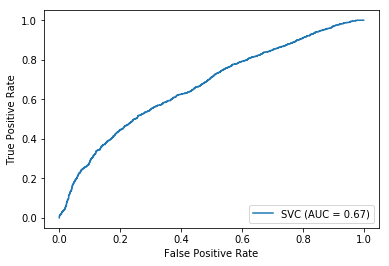

In [98]:
#Plotting the ROC
metrics.plot_roc_curve(clf, test_data, test_label)

In [99]:
clf.score(test_data, test_label)  

0.6325767690253672

In [53]:
#Gridsearch method of Cross validation (different than the one used to plot)

tic = time.clock()
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),n_jobs=-1)
clf.fit(train_data, train_label)        
print(clf.best_score_)                                  
print(clf.best_estimator_.C)                            
toc = time.clock()
print('Elapsed time to load data in seconds:', (toc - tic))

# Prediction performance on test set is not as good as on train set
# Accuracy Score
clf.score(test_data, test_label)      

0.662572318647085
0.0005994842503189409
Elapsed time to load data in seconds: 273.1914281999998


0.6459279038718291

In [56]:
#Making a Prediction
pred= clf.predict(test_data)

In [59]:
#Plotting the confusion Matrix (classes 0, 1)
confusion_matrix(test_label, pred)

array([[1645,  340],
       [ 986,  774]], dtype=int64)

In [60]:
#True neg, False pos, False neg, True pos. from the confusion matrix
tn, fp, fn, tp = confusion_matrix(test_label, pred).ravel()

In [71]:
#This gives us the important points in the ROC
fpr, tpr, thresholds = metrics.roc_curve(test_label, pred, pos_label=1)

In [73]:
print('fpr:', fpr)
print('tpr:', tpr)
print('threshold:', thresholds)

fpr: [0.         0.17128463 1.        ]
tpr: [0.         0.43977273 1.        ]
threshold: [2. 1. 0.]


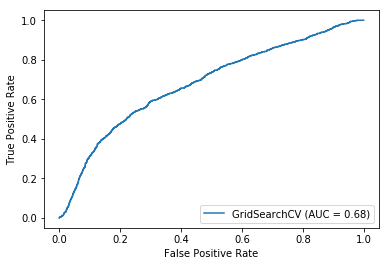

In [67]:
#Plotting the ROC
metrics.plot_roc_curve(clf, test_data, test_label)

# KNN

In [34]:
#Cross Validation for the C metric (K-fold Cross Validation)

tic = time.clock()
X = train_data
y = train_label

n_neighbors = range(1, 101, 1)
neigh = KNeighborsClassifier(n_neighbors)
#neigh.fit(X)

scores = list()
scores_std = list()
for n in n_neighbors:
    neigh.n_neighbors = n
    #print(neigh.n_neighbors)
    neigh.fit(X,y)
    this_scores = cross_val_score(neigh, X, y)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

toc = time.clock()
print('Elapsed time to load data in seconds:', (toc - tic))

Elapsed time to load data in seconds: 266.6923405


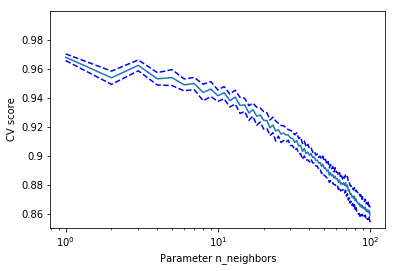

In [37]:
# Plotting cross validation
plt.figure()
plt.semilogx(n_neighbors, scores)
plt.semilogx(n_neighbors, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(n_neighbors, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter n_neighbors')
plt.ylim(0.85, 1)
plt.show()

In [82]:
tic = time.clock()
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X,y)
toc = time.clock()
print('Elapsed time to load data in seconds:', (toc - tic))

Elapsed time to load data in seconds: 0.044606800000110525


In [83]:
#Making a Prediction
tic = time.clock()
pred= neigh.predict(test_data)
toc = time.clock()
print('Elapsed time to load data in seconds:', (toc - tic))

Elapsed time to load data in seconds: 0.34876730000087264


In [84]:
#Plotting the confusion Matrix (classes 0, 1)
confusion_matrix(test_label, pred)

array([[1949,   36],
       [  61, 1699]], dtype=int64)

In [85]:
#True neg, False pos, False neg, True pos. from the confusion matrix
tn, fp, fn, tp = confusion_matrix(test_label, pred).ravel()

In [86]:
#This gives us the important points in the ROC
fpr, tpr, thresholds = metrics.roc_curve(test_label, pred, pos_label=1)

In [87]:
print('fpr:', fpr)
print('tpr:', tpr)
print('threshold:', thresholds)

fpr: [0.         0.01813602 1.        ]
tpr: [0.         0.96534091 1.        ]
threshold: [2. 1. 0.]


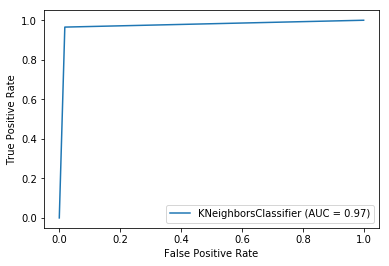

In [88]:
#Plotting the ROC
metrics.plot_roc_curve(neigh, test_data, test_label)

In [89]:
neigh.score(test_data, test_label)      

0.9740987983978638

# Ada Boost

In [28]:
#Cross Validation for the Adaboost (K-fold Cross Validation)

tic = time.clock()
X = train_data
y = train_label

n_estim = range(10, 500, 50)
bdt = AdaBoostClassifier(
                         algorithm="SAMME",
                         n_estimators=1)
bdt.fit(X,y)

scores = list()
scores_std = list()
for n in n_estim:
    bdt.n_estimators = n
    #bdt.fit(X,y)
    this_scores = cross_val_score(bdt, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

toc = time.clock()
print('Elapsed time to load data in seconds:', (toc - tic))

Elapsed time to load data in seconds: 114.54035840000006


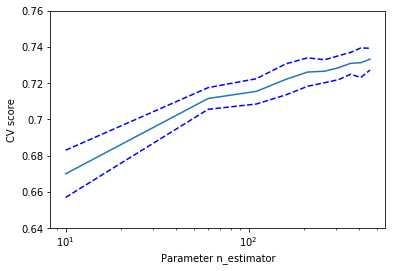

In [32]:
# Plotting cross validation
plt.figure()
plt.semilogx(n_estim, scores)
plt.semilogx(n_estim, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(n_estim, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter n_estimator')
plt.ylim(0.64, 0.76)
plt.show()

In [49]:
tic = time.clock()
adt = AdaBoostClassifier(
                         algorithm="SAMME",
                         n_estimators=1000)
adt.fit(X,y)
toc = time.clock()
print('Elapsed time to load data in seconds:', (toc - tic))

Elapsed time to load data in seconds: 10.52627829999983


In [50]:
#Making a Prediction
tic = time.clock()
pred= adt.predict(test_data)
toc = time.clock()
print('Elapsed time to load data in seconds:', (toc - tic))

Elapsed time to load data in seconds: 0.31158809999942605


In [51]:
#Plotting the confusion Matrix (classes 0, 1)
confusion_matrix(test_label, pred)

array([[1618,  367],
       [ 573, 1187]], dtype=int64)

In [52]:
#True neg, False pos, False neg, True pos. from the confusion matrix
tn, fp, fn, tp = confusion_matrix(test_label, pred).ravel()

In [53]:
#This gives us the important points in the ROC
fpr, tpr, thresholds = metrics.roc_curve(test_label, pred, pos_label=1)

In [54]:
print('fpr:', fpr)
print('tpr:', tpr)
print('threshold:', thresholds)

fpr: [0.         0.18488665 1.        ]
tpr: [0.         0.67443182 1.        ]
threshold: [2. 1. 0.]


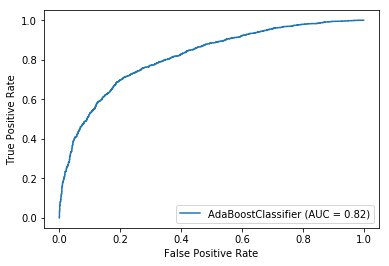

In [55]:
#Plotting the ROC
metrics.plot_roc_curve(adt, test_data, test_label)

In [56]:
adt.score(test_data, test_label)    

0.7489986648865153